# PROBLEM

### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

### This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. 

### Explore and analyze the data to discover important factors that govern the bookings. 

# Objective

We have a Dataset of hotel booking analysis from years 2015 to 2017 and having 32 columns. Our aims to find the relevent insights from this dataset. The objectives are as follows:   

>**1. Univariate Analysis:**

>**2.	Hotel wise Analysis:** 

>**3. Distribution channel wise Analysis:** 

>**4.	Booking cancellation Analysis:** 

# IMPORT PYTHON LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mounting drive:-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UPLOAD THE DATASET

In [ ]:
hotel_booking = pd.read_csv('/content/drive/MyDrive/Capstone project-1 (Hotel_booking)/data.csv') 

# DATA EXPLORATION

In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {hotel_booking.shape[0]} rows and {hotel_booking.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [ ]:
# Taking a look on DataFrame (Checking top two rows)

hotel_booking.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
# Checking bottom two rows

hotel_booking.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [ ]:
# Taking a look on datatypes of the DataFrmae 

hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 **As we found 32 datatypes out of which:**
 * Float = 4
 * Int = 16
 * Object = 12

## Data Description:

- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days thaat elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
# Describe the data in DataFrame

hotel_booking.describe().T.shape

(20, 8)

In [ ]:
hotel_booking.describe(include='all').T.shape                # describe all columns

(32, 11)

In [ ]:
hotel_booking.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# Fetch the columns name list

print(list(hotel_booking.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Now our first aim to undersatnd the meanings of all columns in the DataFrame

print(hotel_booking['hotel'].unique())
print(hotel_booking['is_canceled'].unique())
print(hotel_booking['arrival_date_year'].unique())
print(hotel_booking['meal'].unique())
print(hotel_booking['market_segment'].unique())
print(hotel_booking['distribution_channel'].unique())
print(hotel_booking['children'].unique())
print(hotel_booking['country'].unique())
print(hotel_booking['country'].unique())

['Resort Hotel' 'City Hotel']
[0 1]
[2015 2016 2017]
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
[ 0.  1.  2. 10.  3. nan]
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS

# Cleaning data 

**Cleaning data is crucial step before EDA as it will remove the vague data that can affect the outcome of EDA.** While cleaning data we will perform following steps: 

 **1) Remove duplicate rows.**
 
 **2) Handling missing values.**
 
 **3) Convert columns to appropriate datatypes.**
 
 **4) Adding important columns.**

# Step 1: Removing duplicate rows if any

In [ ]:
# checking for the duplicate rows

hotel_booking.duplicated().value_counts()                                                  #true means duplicate rows

False    87396
True     31994
dtype: int64

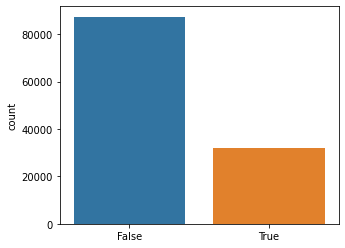

In [ ]:
# Visulizing through Count pot

plt.figure(figsize=(5,4))
sns.countplot(x=hotel_booking.duplicated())

**So we have `31994 duplicate rows` in our data. So we will drop the duplicate rows from our data**

In [ ]:
# Dropping duplicate values and save the new DataFrame

hotel_booking.drop_duplicates(inplace = True)

In [ ]:
# Check the size of DataFrame after the dropping duplicate values

hotel_booking.shape

(87396, 32)

# Step2: Handling missing values.

In [ ]:
# Columns having missing values.

hotel_booking.isnull().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0


Text(0.5, 1.0, 'Missing values in column')

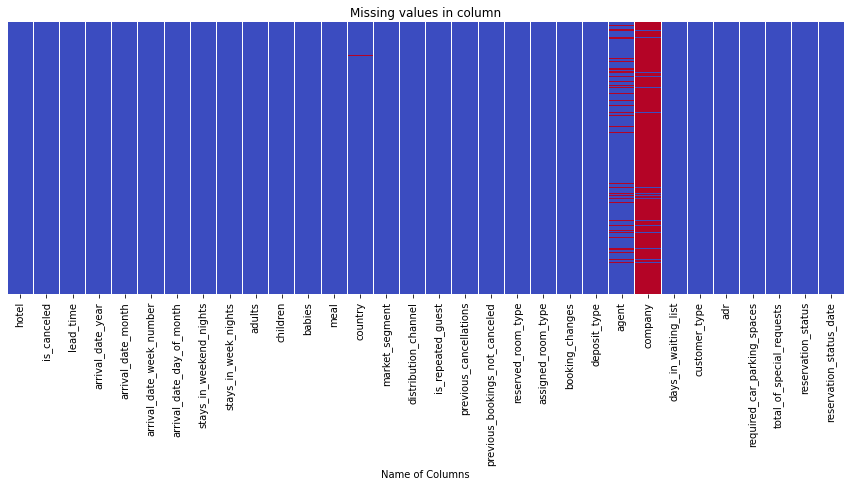

In [ ]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(15, 5))
sns.heatmap(hotel_booking.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in column")

**We Have Null values in columns- Company, agent, Country,children. To replace these values we should use our intuitive on column wise:**
   
   * `company and agent columns` have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. We will replace null values by 0 in these columns.
   
   * `for country`, we will replace missing values with 'Others'. (assuming while collecting data country was not found so user selected the 'Others' option).
   
   * AS the count of missing values in `Children Column` is only 4, so we can replace with 0 considering no childrens.

In [ ]:
# Filling/replacing null values with 0.

hotel_booking[['company','agent', 'children']] = hotel_booking[['company','agent', 'children']].fillna(0).inplace=True

# Replacing NA values with 'others'

hotel_booking['country'].fillna('others',inplace=True)

In [ ]:
# Recheck the DataFrame 
hotel_booking.shape

(87396, 32)

In [ ]:
# Recheck the Null values in DataFrame

hotel_booking.isnull().sum().sort_values(ascending=False)[:2].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0


In [ ]:
hotel_booking[hotel_booking['adults']+hotel_booking['babies']+hotel_booking['children'] == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  bool   
 11  babies                          87396 non-null  int64  
 12  meal                           

**We can see here children, agent, country is in bool datatype so first convert it into int datatype.**

# Step 3: Converting columns to appropriate datatypes. 

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from bool to int.

hotel_booking[['children', 'company', 'agent']] = hotel_booking[['children', 'company', 'agent']].astype('int64')

In [ ]:
# Converting datatype of column 'reservation_status_date' to data_type.

hotel_booking['reservation_status_date'] = pd.to_datetime(hotel_booking['reservation_status_date'], format = '%Y-%m-%d')

# Step 4: Adding important columns.

In [ ]:
# Calculating the total_stay by adding `stays_in_weekend_nights` and `stays_in_week_nights`

hotel_booking['total_stay'] = hotel_booking['stays_in_weekend_nights']+hotel_booking['stays_in_week_nights']

# Calculating total_people by adding (numbers of adults + children + babies)

hotel_booking['total_people'] = hotel_booking['adults']+hotel_booking['children']+hotel_booking['babies']

In [ ]:
hotel_booking.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,3
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,3


In [ ]:
hotel_booking.shape 

(87396, 34)

### Now our dataset is ready for Analysis (we have replace duplicates, NaN values, and convert unapropriate datatype to appropriate datatype)

# Univariate Analysis

### Q1) Which type of hotel is mostly prefered by the guests?

In [ ]:
# Fetch mostly prefered hotels

most_preferred_hotel = hotel_booking['hotel'].value_counts()
most_preferred_hotel

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

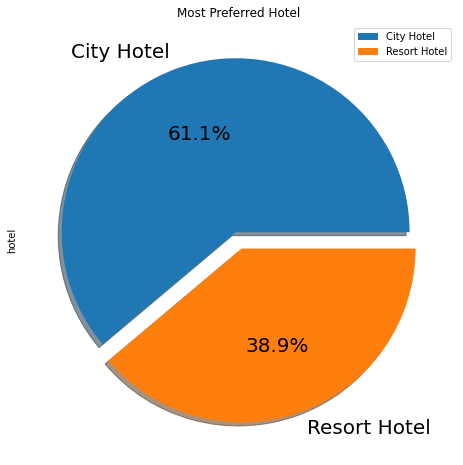

In [ ]:
# Visualizsing the by pie chart.  

most_preferred_hotel.plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Most Preferred Hotel')
plt.legend()
plt.show() 

**Observation :** 
>`City Hotel is most preffered hotel` by guests. Thus city hotels has maximum bookings.

### Q2)	From which country most of the customers are coming? 

In [ ]:
# Fetch mostly visited country

most_visited_country = hotel_booking['country'].value_counts().reset_index()[:10].rename(columns={'index':'country', 'country':'Number_of_customers'})
most_visited_country               

,country,Number_of_customers
0,PRT,27453
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
5,ITA,3066
6,IRL,3016
7,BEL,2081
8,BRA,1995
9,NLD,1911


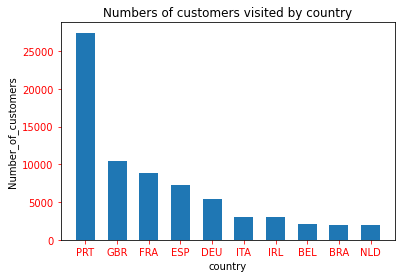

In [ ]:
# Visualizsing the data using bar chart

x = most_visited_country['country']
y = most_visited_country['Number_of_customers']

plt.bar(x,y,  width = 0.6)
plt.title('Numbers of customers visited by country')                        #color = "red"
plt.xlabel('country')
plt.ylabel('Number_of_customers')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

plt.show()

 **Obervation :** 
 >Most of customers are from `PRT country`

### Q3) What is the most preferred meal by customers?

In [ ]:

most_preferred_meal = hotel_booking['meal'].value_counts().reset_index().rename(columns={'index':'meal', 'meal':'Number_of_preferred_meal'})

most_preferred_meal

,meal,Number_of_preferred_meal
0,BB,67978
1,SC,9481
2,HB,9085
3,Undefined,492
4,FB,360


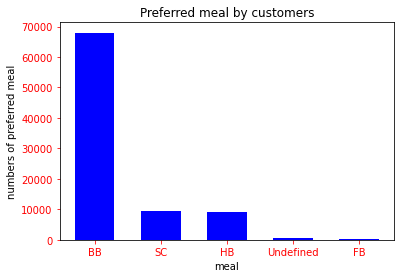

In [ ]:
# Visualizsing the data using bar chart

x = most_preferred_meal['meal']
y = most_preferred_meal['Number_of_preferred_meal']
plt.bar(x,y, color = "blue", width = 0.6)
plt.title('Preferred meal by customers')
plt.xlabel('meal')
plt.ylabel('numbers of preferred meal')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')


plt.show()

**Observation :** 
>most preferred meal is `BB – Bed & Breakfast`

>`HB-Half Board` and `SC-Self Catering` are equally preferred

### Q4) What is the pecentage of cancellation?

In [ ]:
# Fetch mostly prefered hotels
df = hotel_booking['is_canceled'].value_counts()
df

0    63371
1    24025
Name: is_canceled, dtype: int64

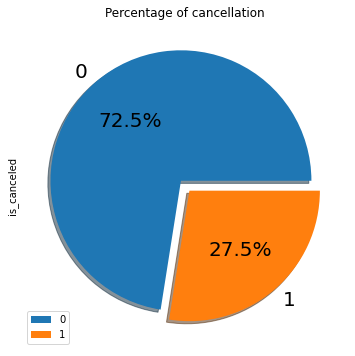

In [ ]:
# Visualizsing data by pie chart.

df.plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,6),fontsize=20, subplots=True)   
plt.title('Percentage of cancellation')
plt.legend()
plt.show() 

##### Observation : 
>27.5 % of the bookings were cancelled.
   * 0= not cancled
   * 1= canceled


### Q5) What is the Percentage of repeated guests?

In [ ]:
# Fetch the data of is_repeated_guest

repeated_guests = hotel_booking['is_repeated_guest'].value_counts()
repeated_guests

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

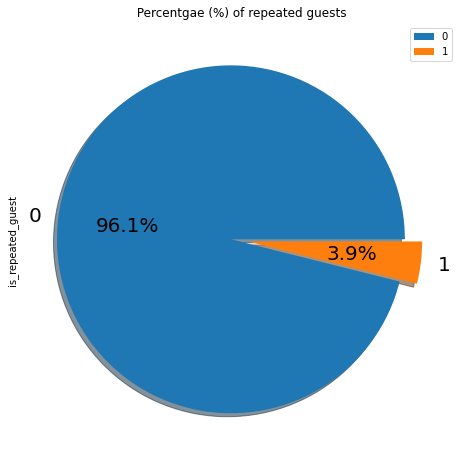

In [ ]:
# Visualizsing data by pie chart.

repeated_guests.plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")
plt.legend()
plt.show() 

**Observation:** 
>percentage of repeated guests is only `3.9 %.`

### 6) What is the percentage distribution of "Customer Type"?

In [ ]:
# Fetch the data of type of customers

customers_distribuation = hotel_booking['customer_type'].value_counts().reset_index().rename(columns={'index':'customer_type','customer_type':'number of visit'})
customers_distribuation

,customer_type,number of visit
0,Transient,71986
1,Transient-Party,11727
2,Contract,3139
3,Group,544


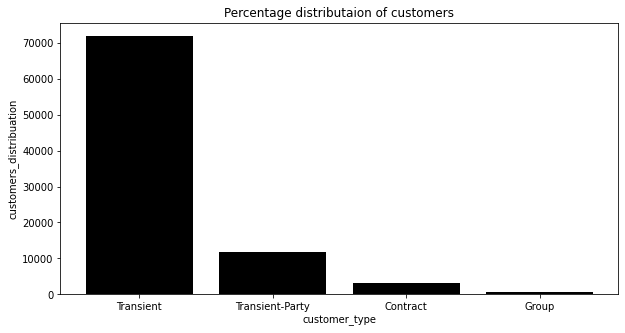

In [ ]:
# Visualizsing the data using bar chart

x = customers_distribuation['customer_type']
y = customers_distribuation['number of visit']

plt.figure(figsize=(10,5))
plt.bar(x,y, color = "black")

plt.title('Percentage distributaion of customers')
plt.xlabel('customer_type')
plt.ylabel('customers_distribuation')
plt.show()

**Observation:**
>Percentage of `Transient customer` is highest `82.4 %`

### Q7) What is the percentage distribution of required_car_parking_spaces?

In [ ]:
# Fetch the data of required_car_parking_spaces

car_parking_space = hotel_booking['required_car_parking_spaces'].value_counts()
car_parking_space

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

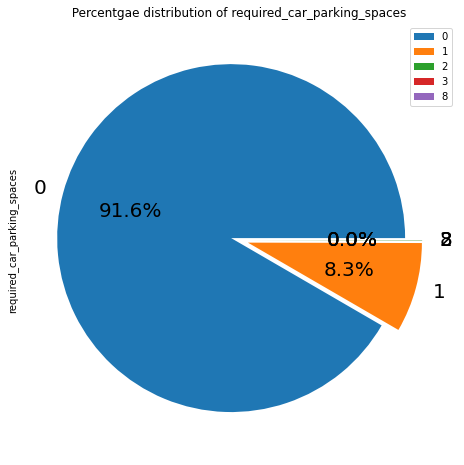

In [ ]:
# Visualizsing data by pie chart.

car_parking_space.plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=20)

plt.title(" Percentgae distribution of required_car_parking_spaces ")
plt.legend()
plt.show() 

**Observation :** 
>`91.6 % guests did not required the parking space`. only 8.3 % guests required only 1 parking space.

### Q8) What is the percentage of booking changes made by the customer.?

In [ ]:
# Fetch the data of type of customers

booking_changes = hotel_booking['booking_changes'].value_counts().reset_index()[:5].rename(columns={'index':'customer_type','customer_type':'number of visit'})
booking_changes

,customer_type,booking_changes
0,0,71494
1,1,10902
2,2,3508
3,3,875
4,4,356


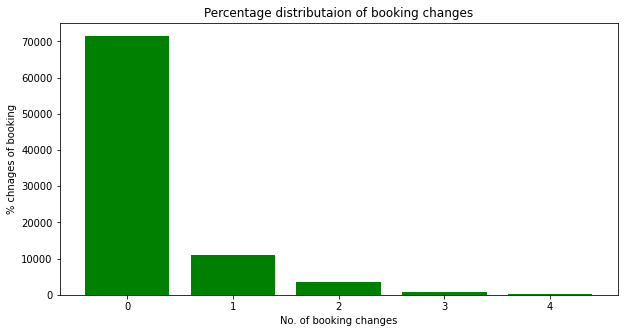

In [ ]:
# Visualizsing the data using bar chart

x = booking_changes['customer_type']
y = booking_changes['booking_changes']

plt.figure(figsize=(10,5))
plt.bar(x,y, color = "green")

plt.title('Percentage distributaion of booking changes')
plt.xlabel('No. of booking changes')
plt.ylabel('% chnages of booking')
plt.show()

**Observation :** Almost `80% of the bookings were not changed by guests.`
>0= 0 changes made in the booking

>1= 1 changes made in the booking



### Q9) What is the percentage of booking for each year?

In [ ]:
# Fetch the arrival_date_year data

arrival_years = hotel_booking['arrival_date_year'].value_counts() #.reset_index()[:5].rename(columns={'index':'customer_type','customer_type':'number of visit'})
arrival_years

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

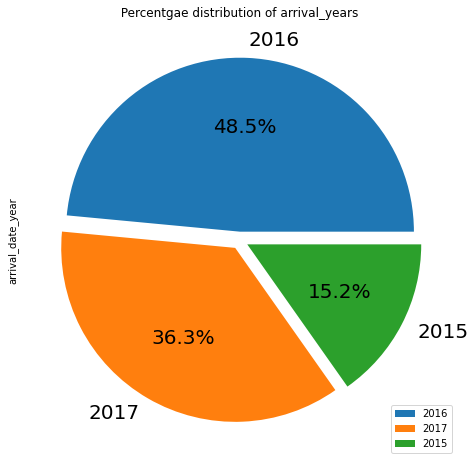

In [ ]:
# Visualizsing data by pie chart.

arrival_years.plot.pie(explode=[0.05]*3,autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=20)

plt.title(" Percentgae distribution of arrival_years ")
plt.legend()
plt.show() 

**Observation:** 

>`Most arrival year is 2016`, followed by 2017 and 2015. 

### Q10) Which room type is in most demand and which room type generates highest adr? 

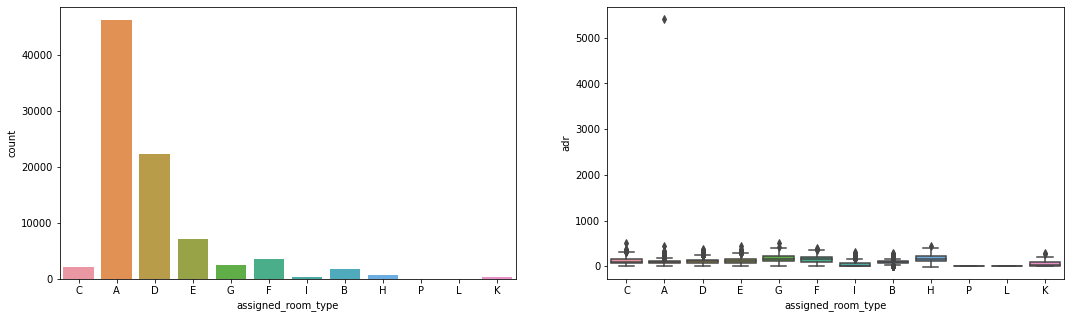

In [ ]:
# Visualizsing the data using bar chart

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

grp_by_room = hotel_booking.groupby('assigned_room_type')
hotel_booking['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hotel_booking['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hotel_booking['assigned_room_type'], y = hotel_booking['adr'])
plt.show()


### Q11) What is Percentage distribution of Deposite type ?

In [ ]:
# Fetch the data from deposite_type

distrubution_of_deposite_type = hotel_booking['deposit_type'].value_counts()
distrubution_of_deposite_type

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

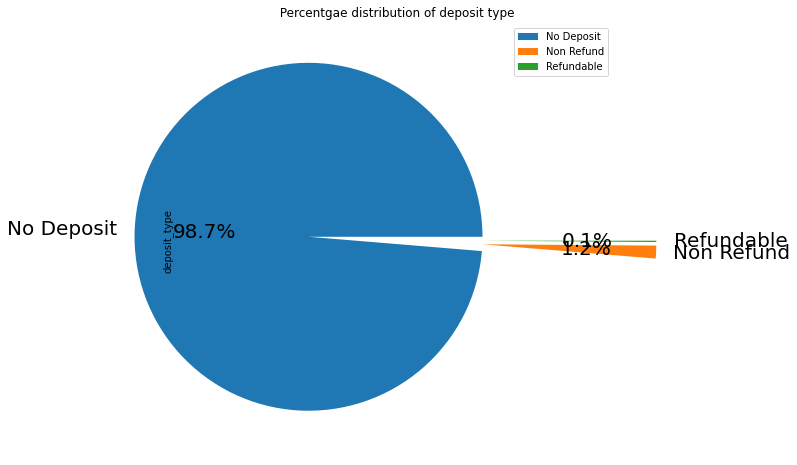

In [ ]:
# Visualizsing data by pie chart.

distrubution_of_deposite_type.plot.pie(explode=[0.5]*3, autopct='%1.1f%%', shadow=False, figsize=(14,8), fontsize=20)

plt.title(" Percentgae distribution of deposit type")
plt.legend()
plt.show() 

**Observation :**
    
>98.7 % of the guests prefer`No deposit` type of deposit.

### Q12) Which is the most preferred room type by the customers?

In [ ]:
# Fetch the data from assigned_room_type

most_preferred_room = hotel_booking['assigned_room_type'].value_counts().reset_index().rename(columns={'index':'room_type','assigned_room_type':'count'})
most_preferred_room

,room_type,count
0,A,46313
1,D,22432
2,E,7195
3,F,3627
4,G,2498
5,C,2165
6,B,1820
7,H,706
8,I,357
9,K,276


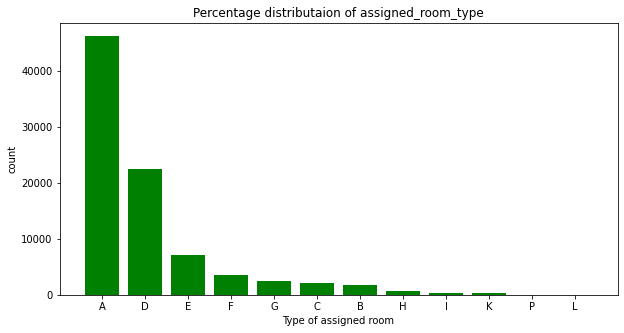

In [ ]:
# Visualizsing the data using bar chart

x = most_preferred_room['room_type']
y = most_preferred_room['count']
plt.figure(figsize=(10,5))
plt.bar(x,y, color = "green")
plt.title('Percentage distributaion of assigned_room_type')
plt.xlabel('Type of assigned room')
plt.ylabel('count')
plt.show()

**Observation :**
    
>Most preferred Room type is "A".